#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория» ФРКТ МФТИ

> Вариант 9

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
from scipy.fft import fft

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

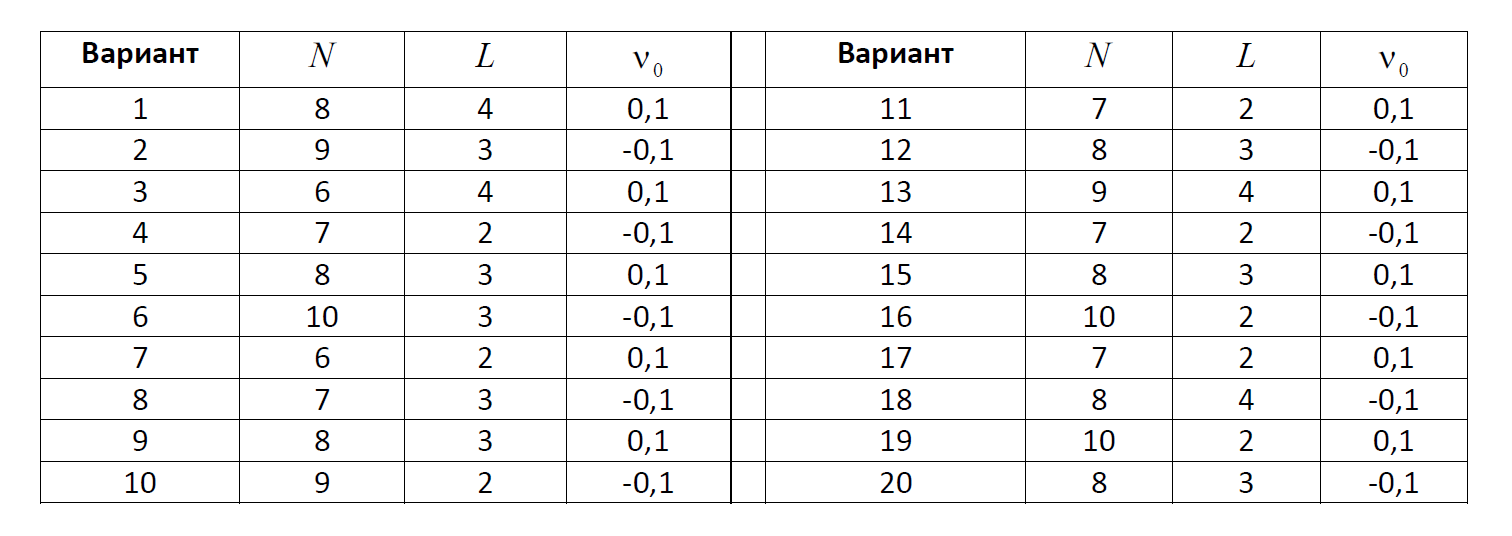

In [2]:
# Вариант 9

N = 8
L = 3
n0 = 0.1

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

| Значение X(0) | Ширина $\Delta\nu$ главного лепестка <br> на нулевом уровне |  Точки скачков фазы <br> на $\pi$  |  Энергия$^2$ |
| :-----------: | :---: | :---: | :---: |
|      $8$       |   $\frac{1}{8}$  |  $-\frac{4}{8}, -\frac{3}{8}, -\frac{2}{8}, -\frac{1}{8}, \\ \frac{4}{8}, \frac{3}{8}, \frac{2}{8}, \frac{1}{8} \\ (\nu = 0 ~не ~включен)$  |  $8$   |

Аналитическая запись ДВПФ имеет вид

$X(\nu) = \frac{sin(N \pi \nu)}{sin(\pi \nu)} e^{-j \pi \nu (N - 1)}$

Энергия выражается через равенство Парсеваля:

$\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu = \Sigma_{-\infty}^{\infty} |x[k]|^2 = \Sigma_0^{N-1} 1 = N$

$^2$ Для дискретного сигнала рассматривают энергию $\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


In [3]:
def DTFT_at(u, x):
    s = 0
    for k in range(len(x)):
        s += x[k] * np.exp(-1j * 2 * np.pi * u * k)
    return s

def DTFT(x, band):
    return np.array([DTFT_at(u, x) for u in band])

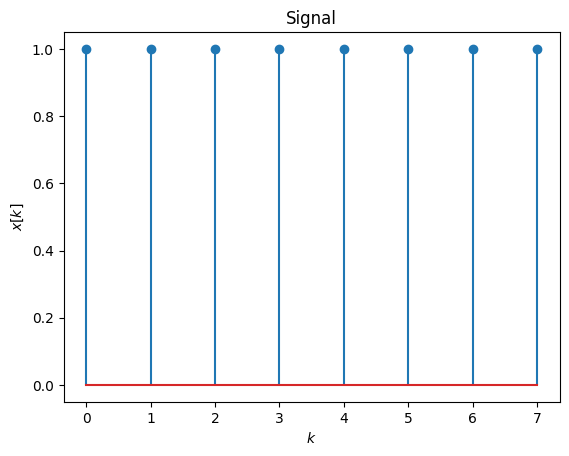

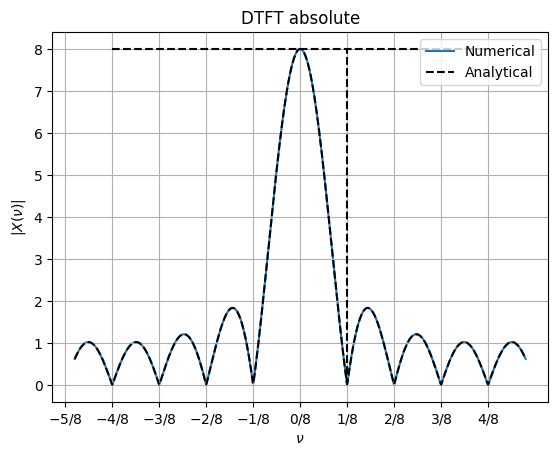

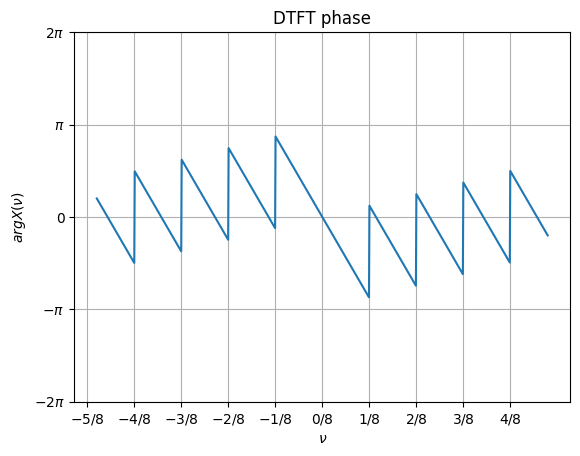

In [4]:
x = np.full([N], 1)

plt.stem(x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Signal")
plt.show()

u_band = np.linspace(-0.6, 0.6, 1000)

X = DTFT(x, u_band)

def analytical(u):
    return np.abs(np.sin(N * np.pi * u) / np.sin(np.pi * u))

plt.plot(u_band, np.absolute(X), label="Numerical", zorder=0)
plt.plot(u_band, analytical(u_band), "k--", label="Analytical")
plt.title("DTFT absolute")
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.vlines([1/8], 0, 8, "k", "dashed")
plt.hlines([8], -0.5, 0.5, "k", "dashed")
plt.legend()

plt.xticks([i/8 for i in range(-5, 5)], [ f"${i}/8$" for i in range(-5, 5)])
plt.grid()
plt.show()

plt.plot(u_band, np.angle(X))
plt.title("DTFT phase")
plt.yticks([0, np.pi, 2 * np.pi, -np.pi, -2*np.pi], ["0", "$\pi$", "$2 \pi$", "$- \pi$", "$-2\pi$",])
plt.xticks([i/8 for i in range(-5, 5)], [ f"${i}/8$" for i in range(-5, 5)])

plt.grid()
plt.xlabel("$\\nu$")
plt.ylabel("$argX(\\nu)$")
plt.show()

## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


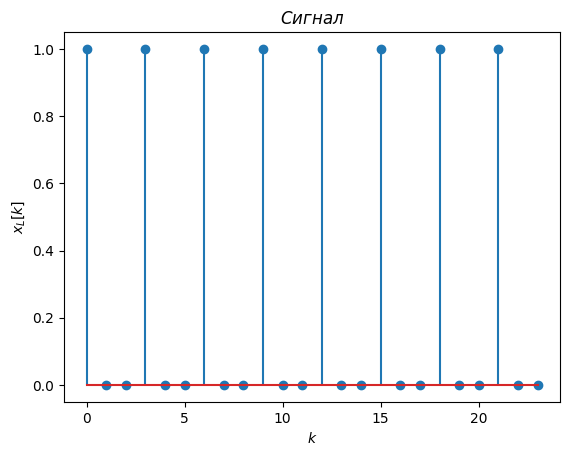

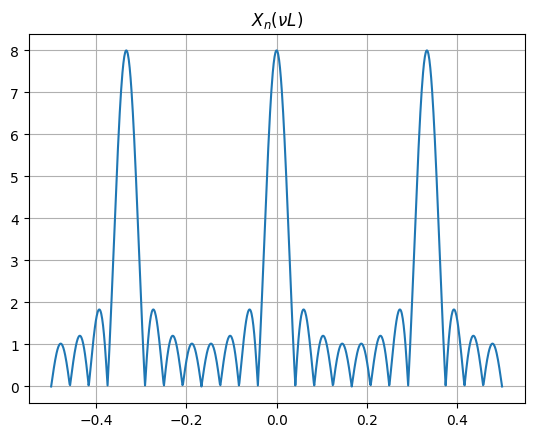

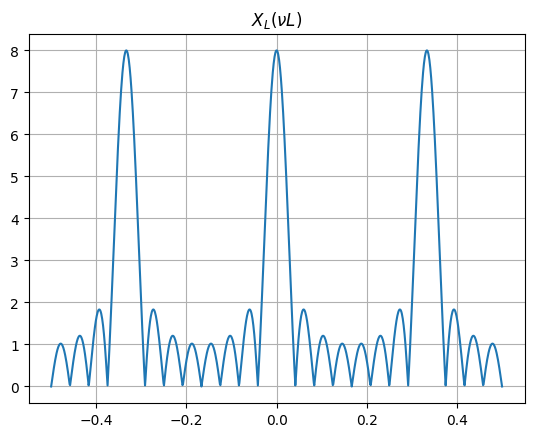

In [5]:
xn = np.full([N], 1)

def one(k):
    if (k == 0): return 1
    return 0

def iterat(k):
    s = 0
    for m in range(N):
        s += xn[m]*one(k - m * L)
    return s

xl = np.array([iterat(k) for k in range(0, 3*N)])

plt.stem(xl)
plt.title("$Сигнал$")
plt.xlabel("$k$")
plt.ylabel("$x_L[k]$")
plt.show()

u_band = np.linspace(-.5, .5, 1000)
Xn = DTFT(xn, u_band * L)
Xl = DTFT(xl, u_band)

plt.plot(u_band, np.abs(Xn))
plt.title("$X_n(\\nu L)$")
plt.grid()
plt.show()

plt.plot(u_band, np.abs(Xl))
plt.title("$X_L(\\nu L)$")
plt.grid()
plt.show()

> Как мы видим, результаты соотносятся со свойством изменения масштаба ДВПФ

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


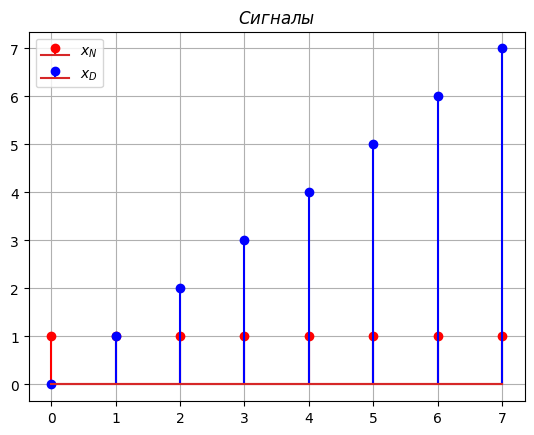

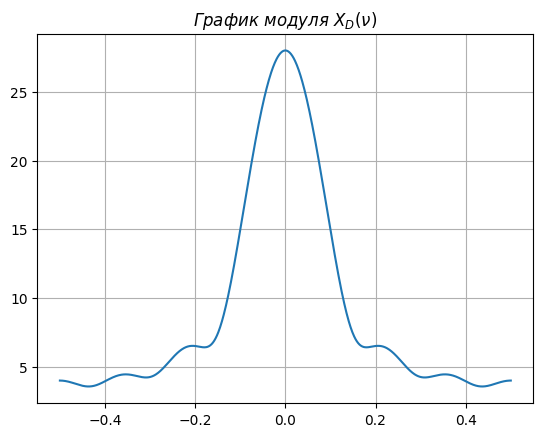

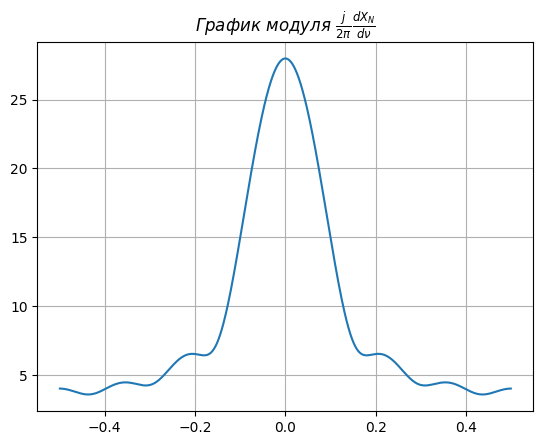

In [6]:
xn = np.full([N], 1)
xd = xn * range(N)

plt.stem(xn, linefmt="r", label="$x_N$")
plt.stem(xd, linefmt="b", label="$x_D$")
plt.grid()
plt.title("$Сигналы$")
plt.legend()
plt.show()

u_band = np.linspace(-.5, .5, 1000)

Xd = DTFT(xd, u_band)
Xn = DTFT(xn, u_band)

# Численно дифференцируем формулой (f(x + h) - f(x - h)) / 2h
def differentiate(X, u_band):
    deriv = np.empty_like(X)[1:-1]
    for i in range(len(u_band))[1:-1]:
        deriv[i - 1] = (X[i + 1] - X[i - 1]) / (u_band[i + 1] - u_band[i - 1])
    
    return u_band[1:-1], deriv

deriv_u, deriv = differentiate(Xn, u_band)

plt.plot(u_band, np.abs(Xd))
plt.title("$График~ модуля ~X_D(\\nu)$")
plt.grid()
plt.show()

plt.plot(deriv_u, np.abs(1j * deriv / (2 * np.pi)))
plt.title("$График ~модуля~ \\frac{j}{2\\pi} \\frac{d X_N}{d\\nu}$")
plt.grid()
plt.show()

> Результаты соотносятся с формулой "умножение на $k$ / дифференцирование по частоте"

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

> $X_S(\nu) = X_N(\nu - \nu_0) ~(Теорема~смещения)$

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

> График действительно смещен вправо на $\nu_0$

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 

> Потому что он является результатом смещения на $\nu_0$ симметричного относительно нуля графика $X_N$

Text(0.5, 1.0, '$График ~модуля~ X_S(\\nu)$')

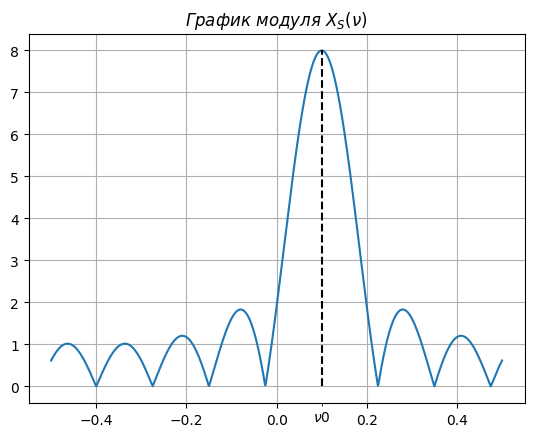

In [7]:
xn = np.full([N], 1)
xs = xn * np.exp(np.arange(N) * 2j * np.pi * n0)

u_band = np.linspace(-.5, .5, 1000)

Xs = DTFT(xs, u_band)
plt.plot(u_band, np.abs(Xs))
plt.grid()

plt.vlines(n0, 0, 8, "k", "dashed")
plt.xticks([n0], ["$\\nu0$"], minor=True)
plt.title("$График ~модуля~ X_S(\\nu)$")

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

| Значение $X(0)$ | Ширина $\Delta\nu$ главного лепестка на нулевом уровне | Энергия$^2$ |
| :-: | :-: | :-: |
| $N^2 = 64$ | $\frac{1}{N} = 0.125$ | $344$ |

Из п.1:

$X_N(\nu) = \frac{sin(N \pi \nu)}{sin(\pi \nu)} e^{-j \pi \nu (N - 1)}$

Обозначим

$x_C = (x_N * x_N)$

Тогда по теореме о свертке

$X_C (\nu) = X_n^2 = \frac{sin^2(N \pi \nu)}{sin^2(\pi \nu)} e^{-j2 \pi \nu (N - 1)}$

$|X_C| = |X_N|^2 = \frac{sin^2(N \pi \nu)}{sin^2(\pi \nu)}$

Энергия выражается через равенство Парсеваля:

$\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu = \Sigma_{-\infty}^{\infty} |x[k]|^2$

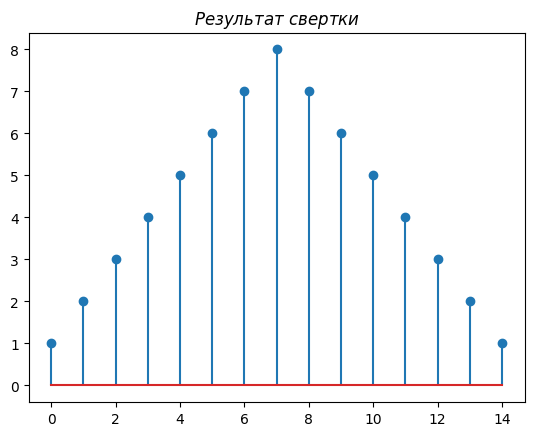

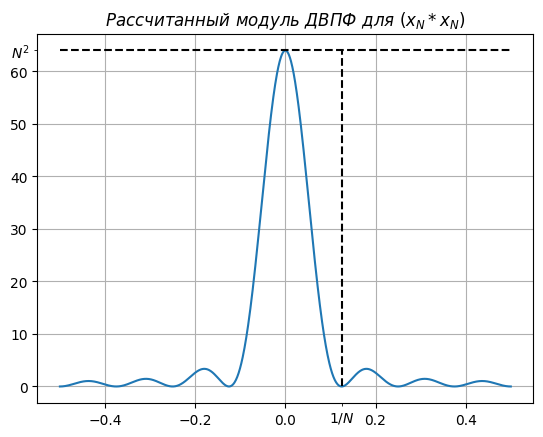

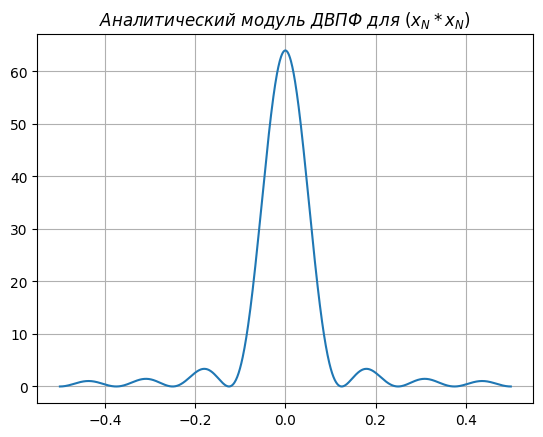

Энергия: 344, 1/N = 0.125000


In [8]:
def conv(x, y):
    z = np.zeros([2 * N - 1])
    for k in range(1, N):
        for m in range(k):
            z[k - 1] += x[m]*y[k - m]
    for k in range(1, N + 1):
        for m in range(k - 1, N):
            z[k + N - 2] += y[m]*x[m - k]
    return z

def analytical2(u):
    return np.sin(N * u * np.pi)**2 / np.sin(u * np.pi)**2

xn = np.full([N], 1)
xc = conv(xn, xn)

plt.stem(xc)
plt.title("$Результат ~свертки$")
plt.show()

u_band = np.linspace(-.5, .5, 1000)
Xc = DTFT(xc, u_band)

plt.plot(u_band, np.abs(Xc))
plt.title("$Рассчитанный ~модуль~ ДВПФ~ для~ (x_N * x_N)$")
plt.grid()
plt.xticks([1/N], ["$1/N$"], minor=True)
plt.yticks([N**2], ["$N^2$"], minor=True)
plt.vlines([1/N], 0, 64, "k", "dashed")
plt.hlines(64, -.5, .5, "k", "dashed")

plt.show()

plt.plot(u_band, analytical2(u_band))
plt.title("$Аналитический ~модуль~ ДВПФ~ для~ (x_N * x_N)$")
plt.grid()
plt.show()

print("Энергия: %d, 1/N = %f" % (np.sum(xc**2), 1/N))


# Занятие 2. Основные свойства ДПФ

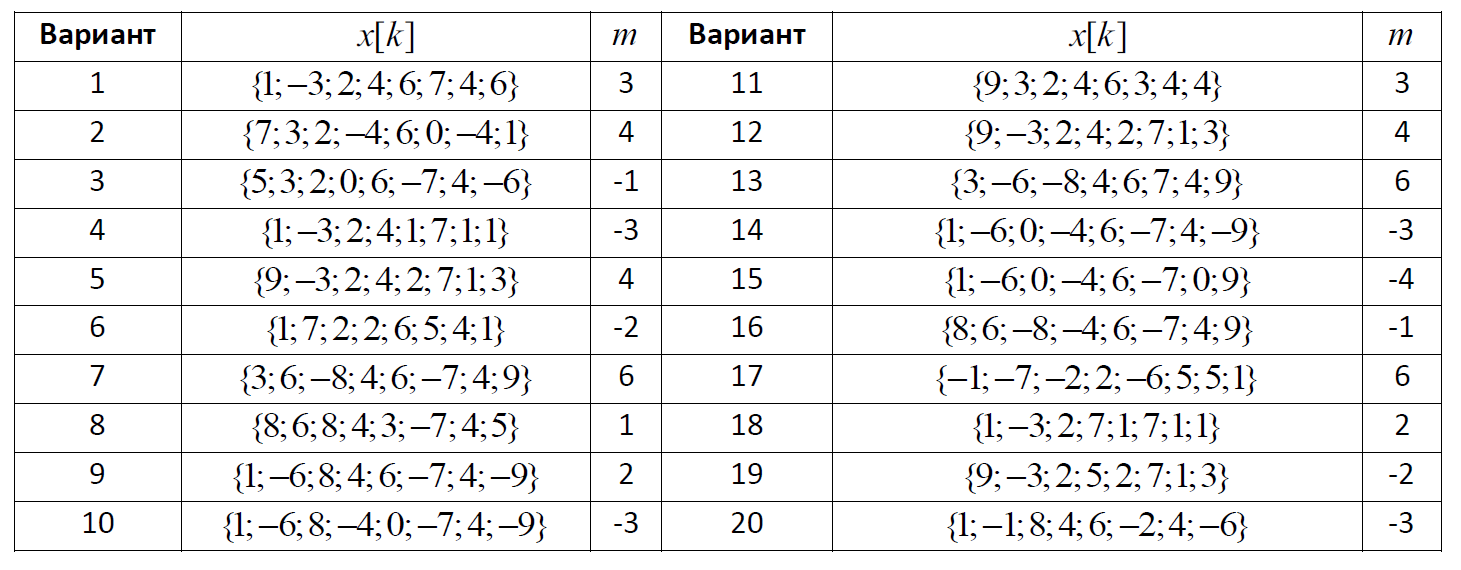

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


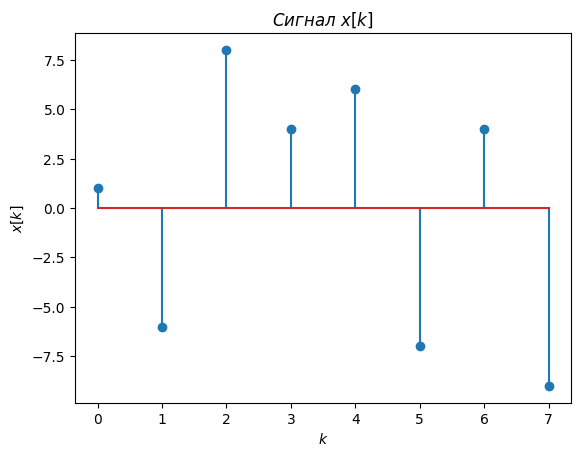

In [9]:
# Вариант 9
x = [1, -6, 8, 4, 6, -7, 4, -9]

plt.stem(x)
plt.title("$Сигнал ~x[k]$")
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.show()

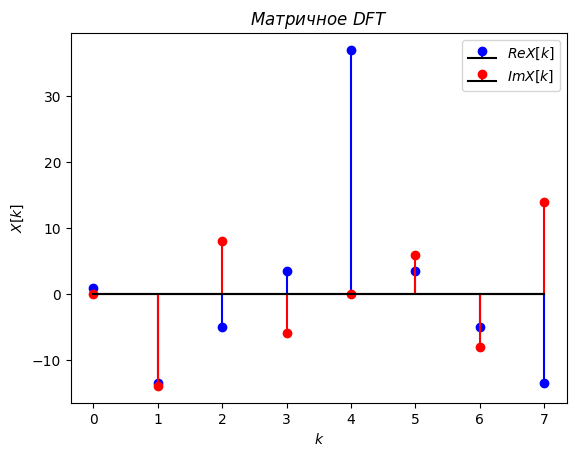

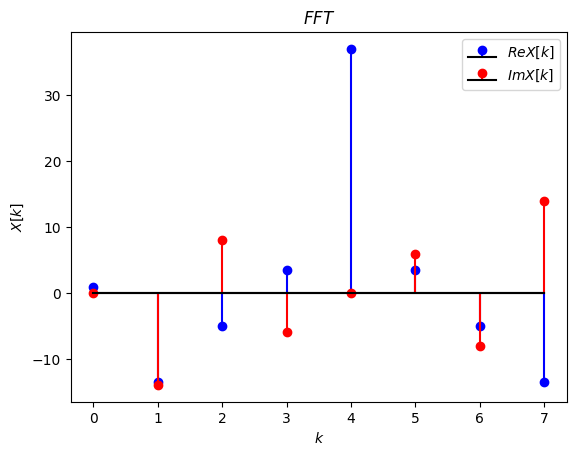

In [10]:
import scipy
import scipy.fft

mat = scipy.linalg.dft(len(x))
X = mat @ x # матрица * вектор

plt.stem(np.real(X), label = "$ReX[k]$", markerfmt="bo", linefmt="b-", basefmt="k-")
plt.stem(np.imag(X), label = "$ImX[k]$", markerfmt="ro", linefmt="r-", basefmt="k-")
plt.title("$Матричное ~DFT$")
plt.xlabel("$k$")
plt.ylabel("$X[k]$")
plt.legend()
plt.show()

X = scipy.fft.fft(x)
plt.stem(np.real(X), label = "$ReX[k]$", markerfmt="bo", linefmt="b-", basefmt="k-")
plt.stem(np.imag(X), label = "$ImX[k]$", markerfmt="ro", linefmt="r-", basefmt="k-")
plt.title("$FFT$")
plt.xlabel("$k$")
plt.ylabel("$X[k]$")
plt.legend()
plt.show()

> Как и ожидалось, результаты совпали

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


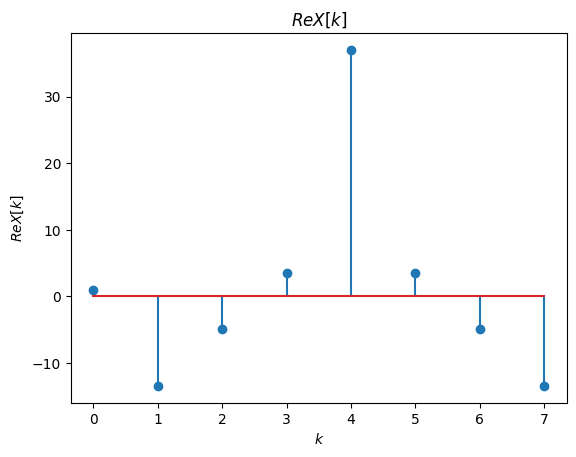

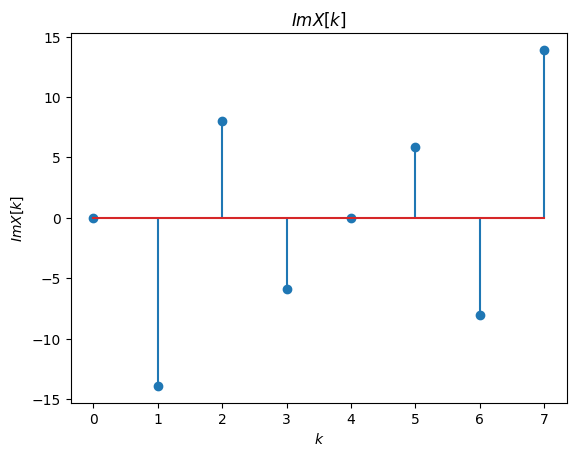

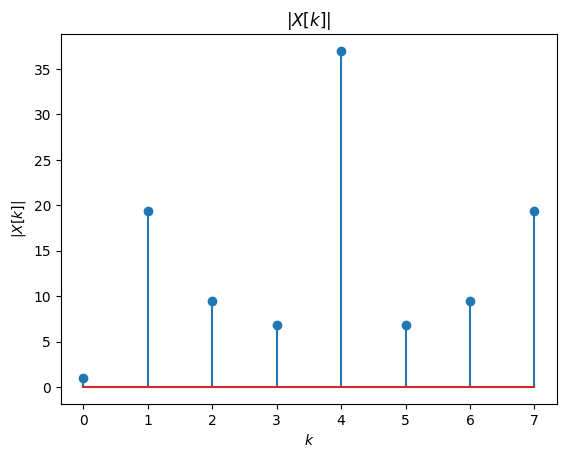

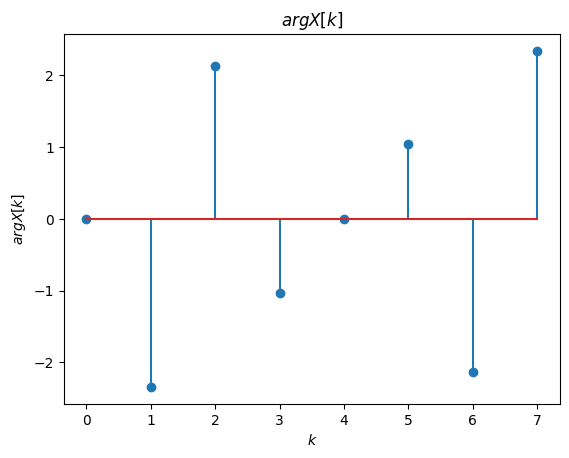

In [11]:
X = scipy.fft.fft(x)

plt.stem(np.real(X))
plt.title("$ReX[k]$")
plt.xlabel("$k$")
plt.ylabel("$ReX[k]$")
plt.show()

plt.stem(np.imag(X))
plt.title("$ImX[k]$")
plt.xlabel("$k$")
plt.ylabel("$ImX[k]$")
plt.show()

plt.stem(np.abs(X))
plt.title("$|X[k]|$")
plt.xlabel("$k$")
plt.ylabel("$|X[k]|$")
plt.show()

plt.stem(np.angle(X))
plt.title("$argX[k]$")
plt.xlabel("$k$")
plt.ylabel("$argX[k]$")
plt.show()


> По графику $ImX[k]$ и $ReX[k]$ мы видим, что вторая часть $(k > N/2)$ спектра комплексно сопряжена с первой его частью $(k < N/2)$, то есть <br> $  X[n] = X^*[N - n] $. Из этого также следует симметрия модуля и антисимметрия фазы.

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


max Im y[k]: 0.000000


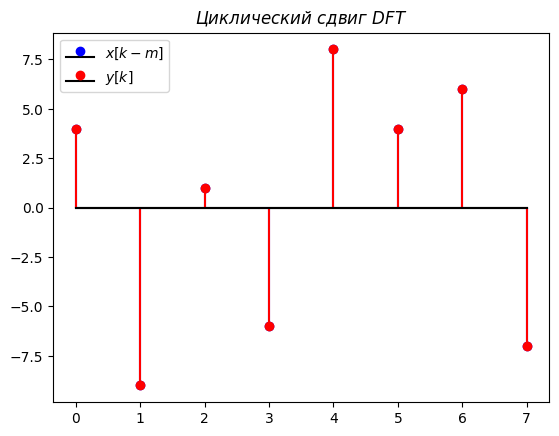

In [12]:
# Вариант 9
m = 2

import scipy.linalg


X = scipy.fft.fft(x)

rot = np.exp((-1j * 2 * np.pi * m / 8)*np.arange(N)) # 8 - это N

Y = rot * X
y = scipy.fft.ifft(Y)

print("max Im y[k]: %f" % np.max(np.abs(np.imag(y)))) # мнимые части получились порядка 1e-15

y = np.real(y)

x_shifted = np.array([x[(i - m) % len(x)] for i in range(len(x))])

plt.stem(x_shifted, linefmt="b-", markerfmt="bo", basefmt="k-", label="$x[k - m]$")
plt.stem(y, linefmt="r-", markerfmt="ro", basefmt="k-", label="$y[k]$")
plt.title("$Циклический ~сдвиг ~DFT$")
plt.legend()
plt.show()

> Как мы видим, $y[k] = x[k - m]$, что согласуется с видом его спектра $Y[k] = \exp \left( -j\frac{2\pi }{N}mk \right)X[k]$. (Теорема запаздывания)

# Занятие 3. Связь ДВПФ и ДПФ

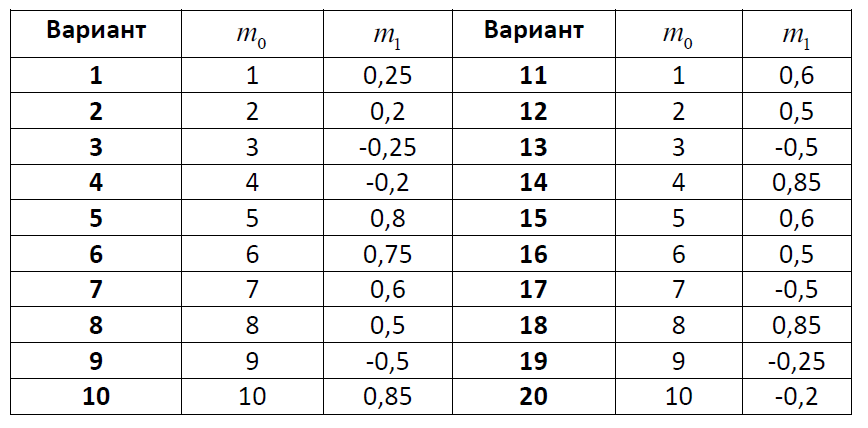

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)

![image.png](assets/image.png)

Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

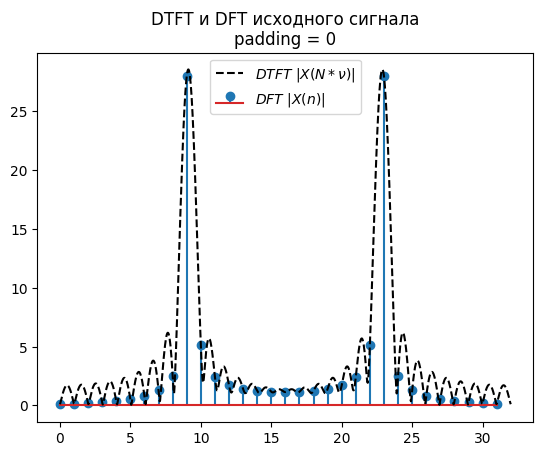

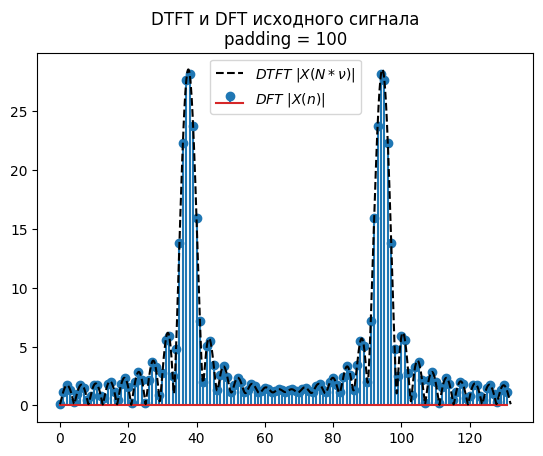

In [43]:
def task31(padding = 0):

    N = 32

    # Вариант 9
    m0 = 9

    k = np.arange(N)

    x = np.sin(2 * np.pi * m0 * k / N) + np.sin(2 * np.pi * (m0 + 0.25) * k / N)

    tmp = np.zeros([N + padding])
    tmp[:N] = x
    x = tmp

    X_dft = np.fft.fft(x)
    plt.stem(np.abs(X_dft), label="$DFT ~ |X(n)|$")

    u_band = np.linspace(0, 1, 1000)

    X_dtft = DTFT(x, u_band)

    plt.plot(u_band * (N + padding), np.abs(X_dtft), "k--", label="$DTFT ~ |X(N*\\nu)|$")
    plt.title(f"DTFT и DFT исходного сигнала\npadding = {padding}")
    plt.legend()
    plt.show()

task31(0)
task31(100)

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

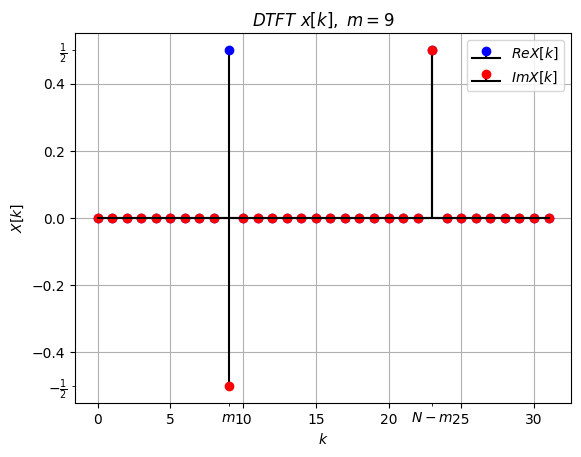

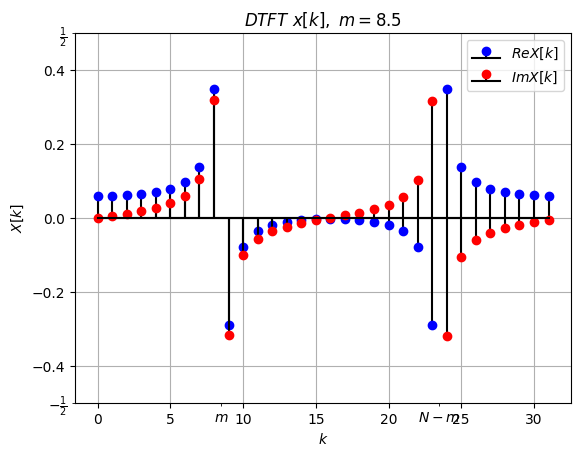

In [79]:
import scipy.fft

# Вариант 9
m0 = 9
m1 = -0.5

def task32(m):
    N = 32
    k = np.arange(N)

    args = 2 * np.pi * m * k / N

    x = np.cos(args) + np.sin(args)

    X = scipy.fft.fft(x) / N

    plt.stem(np.real(X), linefmt="k-", markerfmt="bo", basefmt="k-", label="$ReX[k]$")
    plt.stem(np.imag(X), linefmt="k-", markerfmt="ro", basefmt="k-", label="$ImX[k]$")
    plt.grid()
    plt.legend()
    plt.xlabel("$k$")
    plt.ylabel("$X[k]$")
    plt.title(f"$DTFT ~x[k],~m={m} $")
    plt.xticks([m, N - m], ["$m$", "$N-m$"], minor=True)
    plt.yticks([0.5, -0.5], ["$\\frac{1}{2}$", "$-\\frac{1}{2}$"], minor=True)
    plt.show()

task32(m0)
task32(m0+m1)

### Аналитические записи ДПФ

В случае, когда $m=9 \in Z$, аналитический вид ДПФ легко выводится из разложения синуса/косинуса через экспоненты:

$x[k] = \frac{1}{2}(1 - j) exp(\frac{j 2 \pi}{N}mk) + \frac{1}{2}(1 + j)exp(\frac{j 2 \pi}{N}mk)$

что является обратным ДПФ для $\tilde{X}[n]$. Отсюда

$\tilde{X}[m] = (1 - j) / 2$

$\tilde{X}[-m] = (1 + j) /2$

$\tilde{X}[n \ne \pm m] = 0$

### Веса дельта функций

В обоих случаях веса дельта функций в ДВПФ будут $(1 \pm j) / 2$. В случае $m=9 \in Z$ частота сигнала $m/N$ кратна $1/N$, поэтому мы имеем хороший спектр, отсчеты которого соответствуют весам дельта-функций. Во втором случае это не выполняется. 